#### create dataset

- x = [1.78, 6.12, 6.63, 4.13, 8.55, 10.92, 4.81, 3.75, 2.28, 5.74]
- y = [1.06, 3.04, 3.93, 2.19, 4.89, 5.37, 2.91, 2.36, 1.13, 3.05]

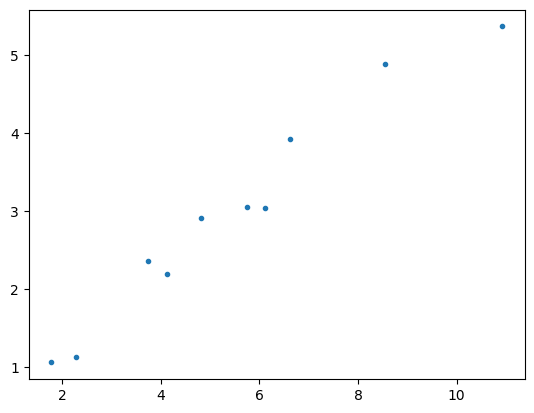

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.78, 6.12, 6.63, 4.13, 8.55, 10.92, 4.81, 3.75, 2.28, 5.74])
y = np.array([1.06, 3.04, 3.93, 2.19, 4.89, 5.37, 2.91, 2.36, 1.13, 3.05])

plt.plot(x, y, '.')
plt.show()

#### linear regression using simple code

In [ ]:
def ols_loss(params, x, y):
    w, b = params
    y_hat = w * x + b
    mse = np.mean((y_hat - y) ** 2)

    return mse

In [27]:
def compute_graident(params, x, y):
    w, b = params
    n = len(x)
    grad_w = (2/n) * np.sum((w*x + b - y) * x)
    grad_b = (2/n) * np.sum(w*x + b - y)
    return np.array([grad_w, grad_b])

def minimize(x, y, learning_rate = 0.01, num_iterations = 1000):
    w, b = 0, 0
    for _ in range(num_iterations):
        gradient = compute_graident([w, b], x, y)
        w = w - learning_rate * gradient[0]
        b = b - learning_rate * gradient[1]
    return w, b


0.5037244251723141 0.23639361345270662


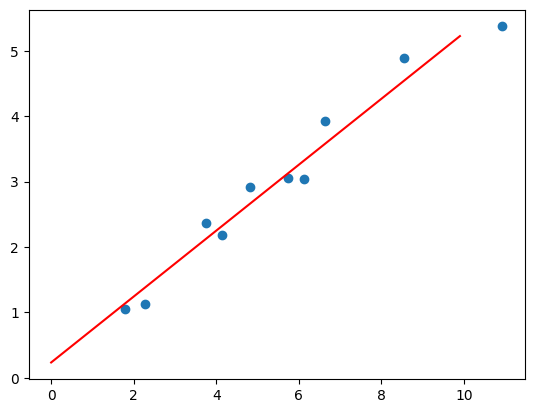

In [29]:
w_opt, b_opt = minimize(x, y)
print(w_opt, b_opt)

x_test = np.arange(0, 10, 0.1)
y_hat = w_opt * x_test + b_opt

plt.scatter(x, y)
plt.plot(x_test, y_hat, c='red')
plt.show()

#### linear regression using scikit_learn

In [6]:

def ols_loss(params, x, y):
    w, b = params
    y_hat = w * x + b
    mse = np.mean((y_hat - y) ** 2)

    return mse


In [20]:
from scipy import optimize
result = optimize.minimize(ols_loss, [1.0, 1.0], args=(x,y))

print(result)
w_opt, b_opt = result.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.06684729140805669
        x: [ 5.031e-01  2.403e-01]
      nit: 6
      jac: [ 8.382e-09 -9.313e-10]
 hess_inv: [[ 7.141e-02 -3.907e-01]
            [-3.907e-01  2.637e+00]]
     nfev: 21
     njev: 7


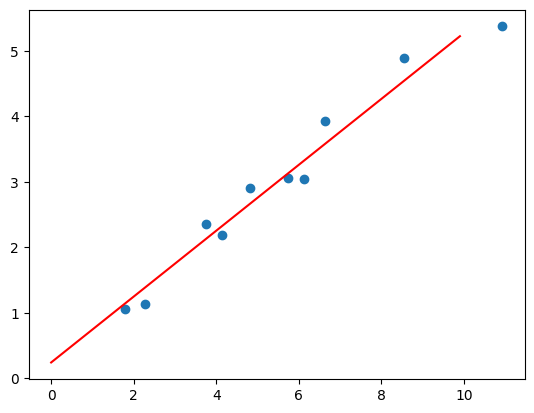

In [23]:
x_test = np.arange(0, 10, 0.1)
y_hat = w_opt * x_test + b_opt

plt.scatter(x, y)
plt.plot(x_test, y_hat, c='red')
plt.show()